<a href="https://colab.research.google.com/github/SeoyoungOhMe/skt-fly-ai-challenger-class/blob/master/02_nn_bin_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 뉴럴네트워크 이진분류
- diabetes dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### 1.데이터준비

In [2]:
!wget https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

--2023-12-29 05:55:33--  https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.003s  

2023-12-29 05:55:33 (8.33 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [3]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.shape

(768, 9)

In [4]:
df = diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.테스트데이터 분리

In [5]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### 3.전처리
- 이상치 처리는 생략함.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

X_train_s

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [8]:
y_train = y_train.values

### 4.모델만들기

In [9]:
X_train_s.shape

(614, 8)

In [40]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(units=3, activation='relu', input_shape=(8,)),
    layers.Dense(units=2, activation='relu'),
    layers.Dense(units=1, activation='sigmoid'),
])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 3)                 27        
                                                                 
 dense_8 (Dense)             (None, 2)                 8         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 38 (152.00 Byte)
Trainable params: 38 (152.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 5.컴파일

In [42]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [54]:
EPOCHS = 100
BATCH_SIZE = 32

history = model.fit(
    X_train_s, y_train,
    batch_size = BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
16/16 [==============================] - 0s 25ms/step - loss: 0.4601 - accuracy: 0.7882 - val_loss: 0.5075 - val_accuracy: 0.7561
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 0.4600 - accuracy: 0.7882 - val_loss: 0.5078 - val_accuracy: 0.7561
Epoch 3/100
16/16 [==============================] - 0s 12ms/step - loss: 0.4599 - accuracy: 0.7882 - val_loss: 0.5078 - val_accuracy: 0.7561
Epoch 4/100
16/16 [==============================] - 0s 17ms/step - loss: 0.4598 - accuracy: 0.7882 - val_loss: 0.5078 - val_accuracy: 0.7561
Epoch 5/100
16/16 [==============================] - 0s 13ms/step - loss: 0.4598 - accuracy: 0.7882 - val_loss: 0.5077 - val_accuracy: 0.7561
Epoch 6/100
16/16 [==============================] - 0s 17ms/step - loss: 0.4597 - accuracy: 0.7882 - val_loss: 0.5075 - val_accuracy: 0.7561
Epoch 7/100
16/16 [==============================] - 0s 11ms/step - loss: 0.4595 - accuracy: 0.7882 - val_loss: 0.5075 - val_accuracy: 0.7561
Epoch 

In [55]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16, 8))
  plt.subplot(1,2,1)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'], label='train loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
  plt.legend()
  plt.show()

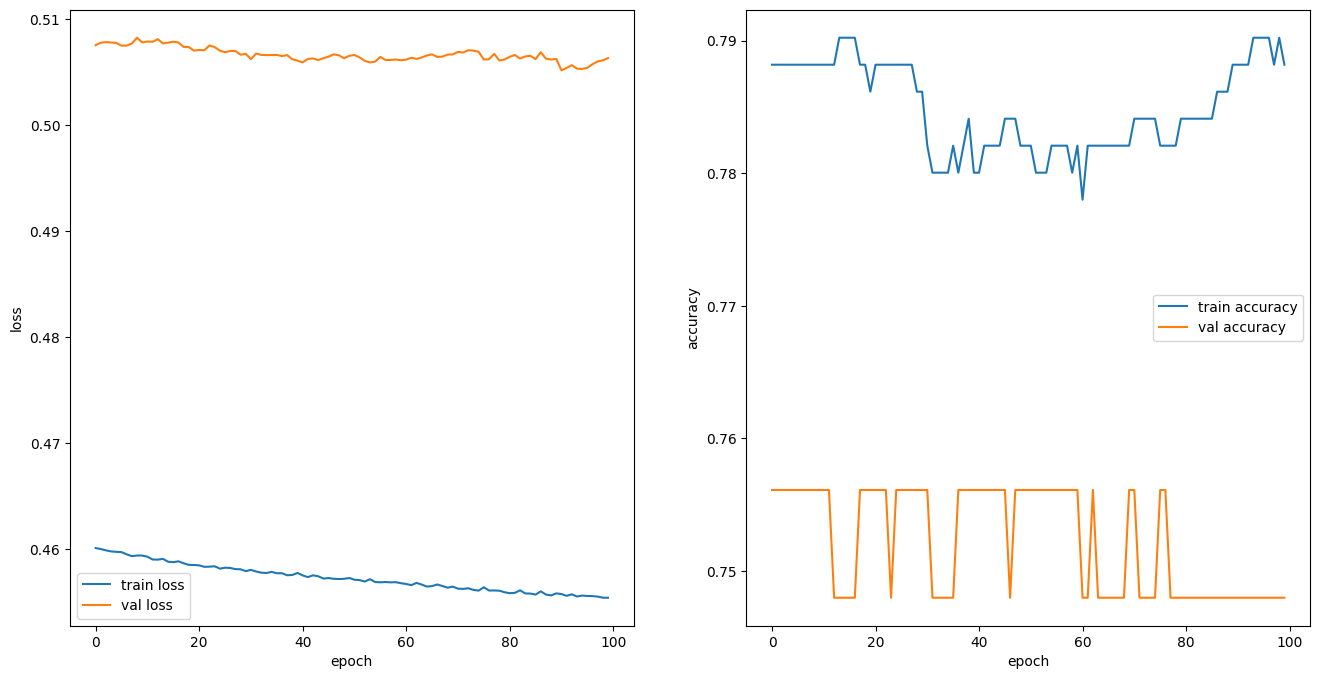

In [56]:
plot_history(history)

### 6.평가

In [57]:
X_test_s = scaler.transform(X_test)

In [58]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [59]:
y_pred = model.predict(X_test_s)
y_pred = y_pred.reshape(-1)
y_pred

5/5 [==============================] - 0s 3ms/step


array([0.28841233, 0.1750293 , 0.11533947, 0.21425447, 0.581603  ,
       0.6719796 , 0.00503235, 0.6423915 , 0.6423915 , 0.6423915 ,
       0.2915932 , 0.6423915 , 0.40214068, 0.476028  , 0.04008896,
       0.47698238, 0.10275188, 0.03382068, 0.6423915 , 0.6423915 ,
       0.300805  , 0.02929616, 0.50501204, 0.03738583, 0.54855704,
       0.6423915 , 0.08211243, 0.01374099, 0.17334054, 0.04903245,
       0.6423915 , 0.6423915 , 0.6423915 , 0.6423915 , 0.6423915 ,
       0.6423915 , 0.6423915 , 0.40745056, 0.6423915 , 0.6423915 ,
       0.03152006, 0.6423915 , 0.6423915 , 0.4766593 , 0.02156479,
       0.6423915 , 0.6423915 , 0.24573633, 0.6423915 , 0.6423915 ,
       0.02837814, 0.6423915 , 0.6423915 , 0.34340057, 0.04796011,
       0.01879735, 0.6423915 , 0.00205344, 0.6423915 , 0.63009465,
       0.6423915 , 0.47255492, 0.81822777, 0.08747498, 0.02657802,
       0.6423915 , 0.02654961, 0.6423915 , 0.02093156, 0.6423915 ,
       0.6423915 , 0.04301875, 0.3167651 , 0.06638161, 0.07907

In [60]:
y_pred = (y_pred > 0.5).astype('int')
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [61]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [62]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

def print_metrics(y_test, y_pred):
  print(f'accuracy : {accuracy_score(y_test, y_pred)}')
  print(f'accuracy : {recall_score(y_test, y_pred)}')
  print(f'accuracy : {precision_score(y_test, y_pred)}')

In [63]:
print_metrics(y_test, y_pred)

accuracy : 0.6948051948051948
accuracy : 0.6727272727272727
accuracy : 0.5606060606060606


 END